In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import math
import statistics
from scipy.stats import norm
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab
import scipy

In [2]:
#large VaR Engine Utilizng the Variance and Covariance Methods
list_assets = ["HSBC", "BCS", "LYG", "RBSPF"]
dict_assets = {}

def data_grabber(tickers, assets):

    for x in tickers:
        try: 
            
            ticker = yf.Ticker(x)
            ticker_data = ticker.history(period = "1y", interval = "1d")
            
            if not ticker_data.empty:
                assets[x] = ticker_data
            else:
                print(f"The associated data for {x} is empty")
        except Exception as e:
            print(f"There was an error in fetching {x} data")
            
    return assets

def returns(dict_assets):
    
    for x in dict_assets:
        df_common = dict_assets[x]    
        df_common["Returns"] = df_common["Close"].pct_change()
        df_common = df_common.dropna()        
        dict_assets[x] = df_common
        
    return dict_assets

def weights(dict_assets):
    int_numb_assets = len(dict_assets.keys())
    array_weights = np.random.dirichlet(np.ones(int_numb_assets),size=1)
    array_weights = np.squeeze(array_weights)

    counter = 0

    for key in dict_assets:

        df_common = dict_assets[key]
        df_common["Weights"] = array_weights[counter]
        df_common = df_common.dropna()
        dict_assets[key] = df_common
        counter = counter + 1
        
    return dict_assets, array_weights

def portfolio(dict_assets):
    
    df_portfolio = pd.concat(dict_assets.values(), axis = 1, keys=dict_assets.keys())
    df_portfolio = df_portfolio.reset_index()
    df_portfolio['Date'] = df_portfolio['Date'].dt.tz_convert('America/New_York').dt.tz_localize(None)

    return df_portfolio
    
def portfolio_return(dict_assets, df_portfolio):
    float_total = 0.0
    
    for x in dict_assets:
        series_returns = df_portfolio[x, "Returns"]
        float_total += series_returns
        
    series_portfolio_return = float_total/float(len(dict_assets))
    df_portfolio["Portfolio Returns"] = series_portfolio_return
    
    return df_portfolio, series_portfolio_return

def plot_portfolio_returns(series_portfolio_return):
    plt.hist(series_portfolio_return, bins=40)
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
def historical_VaR(series_portfolio_return):
    list_confidence_interval = [0.90, 0.95, 0.975, 0.99]
    dict_VaR = {}

    for x in list_confidence_interval:
        VaR = series_portfolio_return.quantile(1-x)
        dict_VaR[x] = VaR
        
    return dict_VaR

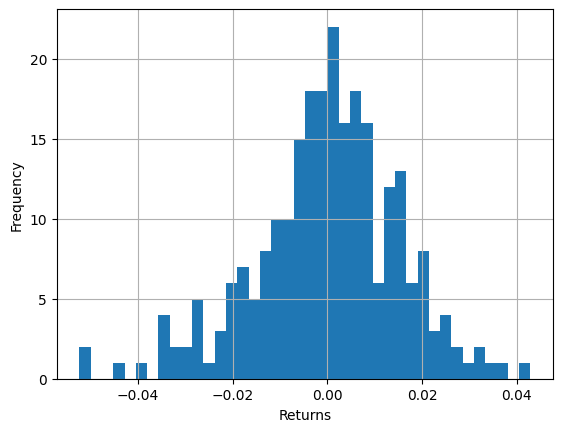

{0.9: -0.01925986705730396,
 0.95: -0.027809101348438236,
 0.975: -0.034287851102981645,
 0.99: -0.04127732176098487}

In [3]:
data_grabber(list_assets, dict_assets)
returns(dict_assets)
dict_assets, array_weights = weights(dict_assets)
df_portfolio = portfolio(dict_assets)
df_portfolio, series_portfolio_return = portfolio_return(dict_assets, df_portfolio)
plot_portfolio_returns(series_portfolio_return)
historical_VaR(series_portfolio_return)
